In [2]:
# %pip install optuna

In [8]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer   # 결측치값 대체.
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline


In [9]:
na_values_df = pd.read_csv("../data/final_dataset.csv")
na_values_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32545 entries, 0 to 32544
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32545 non-null  object 
 1   code_presentation     32545 non-null  object 
 2   id_student            32545 non-null  int64  
 3   gender                32545 non-null  object 
 4   region                32545 non-null  object 
 5   highest_education     32545 non-null  int64  
 6   imd_band              32545 non-null  float64
 7   age_band              32545 non-null  int64  
 8   num_of_prev_attempts  32545 non-null  int64  
 9   studied_credits       32545 non-null  int64  
 10  disability            32545 non-null  object 
 11  date_registration     32545 non-null  float64
 12  date_unregistration   32545 non-null  float64
 13  sum_click             32545 non-null  float64
 14  avg_score             32545 non-null  float64
 15  target             

In [10]:

X = na_values_df.drop(columns='target').values
# X = X.astype('float32')
y = na_values_df['target'].values
y = y.astype(int)

X.shape,  y.shape

((32545, 15), (32545,))

In [11]:
fe_transformer = ColumnTransformer([
    ("category_ohe", OneHotEncoder(), [0, 1, 3, 4, 5, 6, 7, 8, 10]),
    ("number_scaler", StandardScaler(), [9,11,12,13,14])
])
### DataFrame이 입력일 경우 컬럼명이나 컬럼 index를 지정할 수 있다.
### ndarray가 입력일 경우 컬럼(feature) index를 지정.
new_merged_df = fe_transformer.fit_transform(X)
print(new_merged_df)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 455624 stored elements and shape (32545, 58)>
  Coords	Values
  (0, 0)	1.0
  (0, 8)	1.0
  (0, 12)	1.0
  (0, 13)	1.0
  (0, 29)	1.0
  (0, 40)	1.0
  (0, 43)	1.0
  (0, 44)	1.0
  (0, 51)	1.0
  (0, 53)	3.905125197007625
  (0, 54)	-1.8185928989610989
  (0, 55)	0.6671221427396934
  (0, 56)	-0.1670317117402033
  (0, 57)	0.7100890620793591
  (1, 0)	1.0
  (1, 8)	1.0
  (1, 11)	1.0
  (1, 19)	1.0
  (1, 29)	1.0
  (1, 33)	1.0
  (1, 42)	1.0
  (1, 44)	1.0
  (1, 51)	1.0
  (1, 53)	-0.4802620780408252
  (1, 54)	0.3332500664579271
  :	:
  (32543, 20)	1.0
  (32543, 27)	1.0
  (32543, 40)	1.0
  (32543, 42)	1.0
  (32543, 44)	1.0
  (32543, 51)	1.0
  (32543, 53)	-1.211159957215567
  (32543, 54)	0.4144516877944941
  (32543, 55)	-1.487791864498921
  (32543, 56)	-0.5562260670917427
  (32543, 57)	1.0137563256706723
  (32544, 6)	1.0
  (32544, 10)	1.0
  (32544, 11)	1.0
  (32544, 25)	1.0
  (32544, 29)	1.0
  (32544, 36)	1.0
  (32544, 42)	1.0
  (32544, 44)	1.0


In [12]:
X = new_merged_df
X = X.astype('float32')
X = X.toarray()
# y = new_merged_df['target'].values
y = y.astype(int)
X.shape,  y.shape

((32545, 58), (32545,))


 >>> Tuning Decision Tree...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:3.22862초

 >>> Tuning Random Forest...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:3.29281초

 >>> Tuning KNN...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
- Complete:4.55143초

 >>> Tuning SVM...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:23.49856초

 >>> Tuning XGBoost...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:4.69393초

 >>> Tuning Logistic Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:3.46556초

 >>> Tuning SGDClassifier...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
- Complete:0.76926초

 >>> Tuning AdaBoost...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:3.87792초

 >>> Tuning CatBoost...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
- Complete:45.78233초

 >>> Tuning Naive Bayes...
Fitting 5 folds 

c:\Users\Playdata\miniconda3\envs\my_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


- Complete:111.59559초
[✔] 전체 모델과 지표가 저장되었습니다: ../model/all_models.pkl

=== Final Comparison ===
              Model                                                                                                         Best Params  Train Accuracy (CV)  Test Accuracy
           LightGBM                                                       {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 30}             0.898681       0.898857
           CatBoost                                            {'depth': 5, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.03}             0.900688       0.898365
            XGBoost                                                       {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}             0.899623       0.897751
      MLPClassifier {'activation': 'tanh', 'alpha': 0.001, 'batch_size': 64, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}             0.895608       0.894802
      Random Forest                         

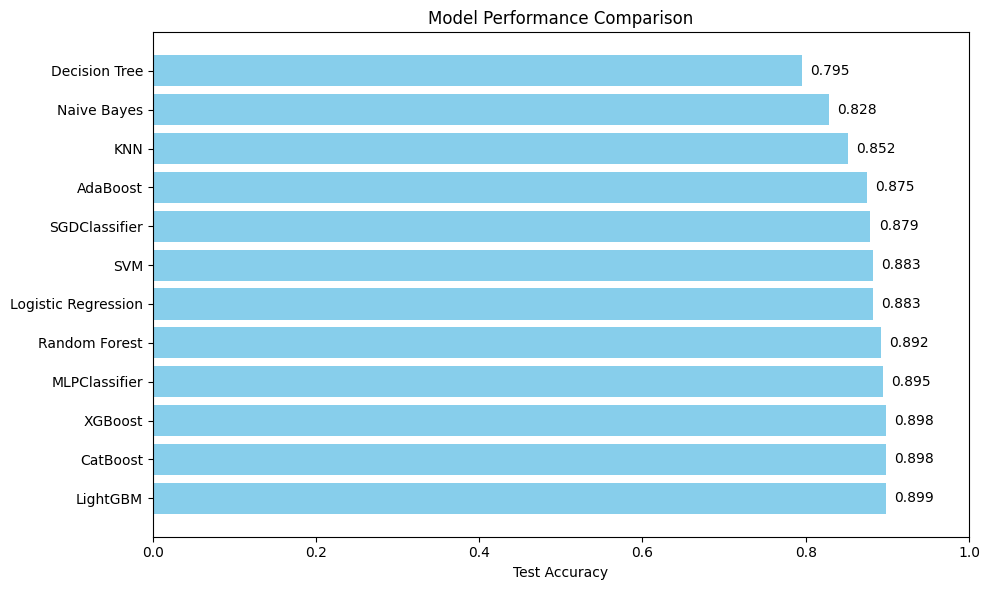


 Decision Tree Best Model Report
              precision    recall  f1-score   support

           0    0.76492   0.81476   0.78905      3822
           1    0.82587   0.77822   0.80134      4315

    accuracy                        0.79538      8137
   macro avg    0.79540   0.79649   0.79519      8137
weighted avg    0.79724   0.79538   0.79557      8137


 Random Forest Best Model Report
              precision    recall  f1-score   support

           0    0.84721   0.94008   0.89123      3822
           1    0.94122   0.84983   0.89319      4315

    accuracy                        0.89222      8137
   macro avg    0.89421   0.89495   0.89221      8137
weighted avg    0.89706   0.89222   0.89227      8137


 KNN Best Model Report
              precision    recall  f1-score   support

           0    0.79570   0.92020   0.85343      3822
           1    0.91794   0.79073   0.84960      4315

    accuracy                        0.85154      8137
   macro avg    0.85682   0.85546   

c:\Users\Playdata\miniconda3\envs\my_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [13]:
import sys
import optuna
from pathlib import Path
# 상위 폴더를 Python 경로에 추가
sys.path.append(str(Path.cwd().parent))
from util.model_tuning import auto_model_tuning
from util.model_io import save_model, load_model, save_models, load_models
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier


X = new_merged_df
X = X.astype('float32')
X = X.toarray()

y = y.astype(int)


base_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "SGDClassifier": SGDClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "Naive Bayes": GaussianNB(),
    "LightGBM": LGBMClassifier(random_state=42),
    "MLPClassifier": MLPClassifier(max_iter=1000, early_stopping=True, random_state=42)
}

param_grids = {
    "Decision Tree": {
        "max_depth": [5], #range(1, 5),
        "max_leaf_nodes": [5], #[3, 5, 10],
        "min_samples_leaf": [2], #[2, 5, 10],
        "max_features": [3]}, #[1, 5, 10]},
    "Random Forest": {
        'n_estimators': [50], # , 100], #200, 300],
        'max_depth':[10],#, 20, 30],
        "min_samples_leaf": [2]#, 5, 10],
        },
    "KNN": {
        'n_neighbors':[3,5],
        'weights': ['uniform', 'distance']},
    "SVM": {
        'C': [0.1], #[0.001,   #, 0.1, 1, 10],
        'gamma': [0.1], #[0.01, 0.1, 1, 10],
        'kernel': ['linear']},
    "XGBoost": {
        'n_estimators': [1000],
        'learning_rate' : [0.01],
        'max_depth': [5]},
    "Logistic Regression": {
        'C': [0.1],  # 규제 강도
        'penalty': [ 'l2'],  # 규제 유형
        'solver': ['saga']},
    "SGDClassifier": {
        'loss': ['log_loss', 'hinge'],  # log_loss=로지스틱, hinge=SVM
        'alpha': [ 0.01],  # 규제 계수
        'learning_rate': ['adaptive'],
        'eta0': [0.1]},
    "AdaBoost": {
        'n_estimators': [ 100],
        'learning_rate': [0.5,]
    },
    "CatBoost": {
        'iterations': [500, 1000],
        'depth': [5], #range(4,8),
        'learning_rate': [0.03, 0.05],
        'l2_leaf_reg' : [3] #range(1, 11)
    },
    "Naive Bayes": {
        # GaussianNB has no hyperparameters commonly tuned, but for structure:
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    "LightGBM": {
        'n_estimators': [100],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [30, 50]
    },
    "MLPClassifier": {
        'hidden_layer_sizes': [(50,), (100,), (50, 30)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001],  # L2 규제 강도
        'learning_rate_init': [0.001, 0.01],
        'batch_size': [32, 64]
    }
}

# 함수 실행
results_df, best_models = auto_model_tuning(base_models, param_grids, X, y, test_size=0.25)


 >>> Tuning Decision Tree...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:0.19037초

 >>> Tuning Random Forest...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:1.31846초

 >>> Tuning KNN...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
- Complete:2.76395초

 >>> Tuning SVM...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:26.70881초

 >>> Tuning XGBoost...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:4.92755초

 >>> Tuning Logistic Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:3.42686초

 >>> Tuning SGDClassifier...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
- Complete:0.82698초

 >>> Tuning AdaBoost...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:4.14618초

 >>> Tuning CatBoost...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
- Complete:47.59983초

 >>> Tuning Naive Bayes...
Fitting 5 folds 

c:\Users\Playdata\miniconda3\envs\my_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


- Complete:6.85943초

 >>> Tuning MLPClassifier...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
- Complete:135.50932초
[✔] 전체 모델과 지표가 저장되었습니다: ../model/all_models.pkl

=== Final Comparison ===
              Model                                                                                                           Best Params  Train Accuracy (CV)  Test Accuracy
      MLPClassifier {'activation': 'tanh', 'alpha': 0.001, 'batch_size': 64, 'hidden_layer_sizes': (50, 30), 'learning_rate_init': 0.001}             0.896067       0.900446
            XGBoost                                                         {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}             0.899485       0.898448
           CatBoost                                              {'depth': 5, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.05}             0.900868       0.897987
           LightGBM                                                         {'learning_rate': 0.

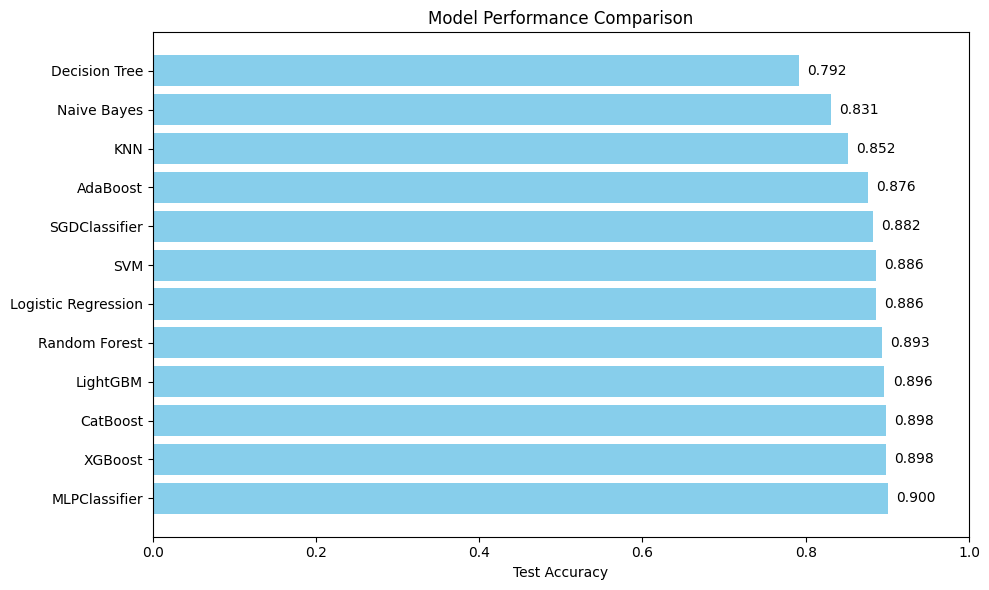


 Decision Tree Best Model Report
              precision    recall  f1-score   support

           0    0.76899   0.79516   0.78185      3056
           1    0.81308   0.78859   0.80065      3453

    accuracy                        0.79167      6509
   macro avg    0.79103   0.79187   0.79125      6509
weighted avg    0.79238   0.79167   0.79182      6509


 Random Forest Best Model Report
              precision    recall  f1-score   support

           0    0.85144   0.93586   0.89166      3056
           1    0.93778   0.85549   0.89474      3453

    accuracy                        0.89322      6509
   macro avg    0.89461   0.89568   0.89320      6509
weighted avg    0.89724   0.89322   0.89330      6509


 KNN Best Model Report
              precision    recall  f1-score   support

           0    0.79863   0.91623   0.85340      3056
           1    0.91475   0.79554   0.85099      3453

    accuracy                        0.85220      6509
   macro avg    0.85669   0.85589   

c:\Users\Playdata\miniconda3\envs\my_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import sys
import optuna
from pathlib import Path
# 상위 폴더를 Python 경로에 추가
sys.path.append(str(Path.cwd().parent))
from util.model_tuning import auto_model_tuning
from util.model_io import save_model, load_model, save_models, load_models
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier


X = new_merged_df
X = X.astype('float32')
X = X.toarray()

y = y.astype(int)


base_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "SGDClassifier": SGDClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "Naive Bayes": GaussianNB(),
    "LightGBM": LGBMClassifier(random_state=42),
    "MLPClassifier": MLPClassifier(max_iter=1000, early_stopping=True, random_state=42)
}

param_grids = {
    # "Decision Tree": {
    #     "max_depth": [3], #range(1, 5),
    #     "max_leaf_nodes": [5], #[3, 5, 10],
    #     "min_samples_leaf": [2], #[2, 5, 10],
    #     "max_features": [3]}, #[1, 5, 10]},
    # "Random Forest": {
    #     'n_estimators': [50], # , 100], #200, 300],
    #     'max_depth':[10],#, 20, 30],
    #     "min_samples_leaf": [2]#, 5, 10],
    #     },
    # "KNN": {
    #     'n_neighbors':[3,5],
    #     'weights': ['uniform', 'distance']},
    # "SVM": {
    #     'C': [0.1], #[0.001,   #, 0.1, 1, 10],
    #     'gamma': [0.1], #[0.01, 0.1, 1, 10],
    #     'kernel': ['linear']},
    # "XGBoost": {
    #     'n_estimators': [1000],
    #     'learning_rate' : [0.01],
    #     'max_depth': [5]},
    # "Logistic Regression": {
    #     'C': [0.1],  # 규제 강도
    #     'penalty': [ 'l2'],  # 규제 유형
    #     'solver': ['saga']},
    # "SGDClassifier": {
    #     'loss': ['log_loss', 'hinge'],  # log_loss=로지스틱, hinge=SVM
    #     'alpha': [ 0.01],  # 규제 계수
    #     'learning_rate': ['adaptive'],
    #     'eta0': [0.1]},
    # "AdaBoost": {
    #     'n_estimators': [ 100],
    #     'learning_rate': [0.5,]
    # },
    # "CatBoost": {
    #     'iterations': [500, 1000],
    #     'depth': [5], #range(4,8),
    #     'learning_rate': [0.03, 0.05],
    #     'l2_leaf_reg' : [3] #range(1, 11)
    # },
    # "Naive Bayes": {
    #     # GaussianNB has no hyperparameters commonly tuned, but for structure:
    #     'var_smoothing': [1e-9, 1e-8, 1e-7]
    # },
    # "LightGBM": {
    #     'n_estimators': [100],
    #     'learning_rate': [0.01, 0.1],
    #     'num_leaves': [30, 50]
    # },
    "MLPClassifier": {
        'hidden_layer_sizes': [(50,), (100,), (50, 30)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001],  # L2 규제 강도
        'learning_rate_init': [0.001, 0.01],
        'batch_size': [32, 64]
    }
}

# 함수 실행
results_df, best_models = auto_model_tuning(base_models, param_grids, X, y)

In [14]:
load_models("../model/all_models.pkl")

[✔] 전체 모델과 지표가 로드되었습니다: ../model/all_models.pkl


{'Decision Tree': {'model': DecisionTreeClassifier(max_depth=5, max_features=3, max_leaf_nodes=5,
                         min_samples_leaf=2, random_state=42),
  'metrics': {'best_params': {'max_depth': 5,
    'max_features': 3,
    'max_leaf_nodes': 5,
    'min_samples_leaf': 2},
   'cv_score': np.float64(0.6448711702300076),
   'test_accuracy': 0.6450780385891606,
   'classification_report': {'0': {'precision': 0.668958031837916,
     'recall': 0.4837781266352695,
     'f1-score': 0.5614940783480109,
     'support': 3822.0},
    '1': {'precision': 0.6327935976177183,
     'recall': 0.7879490150637312,
     'f1-score': 0.7018992568125516,
     'support': 4315.0},
    'accuracy': 0.6450780385891606,
    'macro avg': {'precision': 0.6508758147278171,
     'recall': 0.6358635708495003,
     'f1-score': 0.6316966675802813,
     'support': 8137.0},
    'weighted avg': {'precision': 0.649780259481992,
     'recall': 0.6450780385891606,
     'f1-score': 0.6359500627494479,
     'support': 8

In [10]:
# 전처리기 정의 (예시, 실제 코드에 맞게 조정)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [0, 1, 3, 4, 5, 6, 7, 8, 10, 15]),
        ('num', 'passthrough', [9, 11, 12, 13, 14])
    ]
)

# 원본 DataFrame의 열 이름
original_columns = na_values_df.columns.tolist()  # df는 new_merged_df 만들기 전 원본

# 전처리기를 원본에 fit
preprocessor.fit(na_values_df)

# 변환된 feature 이름 추출
feature_names = preprocessor.get_feature_names_out(original_columns)

# CatBoost 모델
model = best_models["CatBoost"]


# 위에서 구한 feature_names와 매칭
importance_series = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)

importance_series.round(5)

# # 시각화
# plt.figure(figsize=(10, 6))
# top_features.plot(kind='bar')
# plt.title("CatBoost - Top 20 Feature Importances")
# plt.ylabel("Importance Score")
# plt.xlabel("Feature")
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

cat__is_dropout_1                   32.17187
cat__is_dropout_0                   17.41425
num__sum_click                      12.84007
num__date_unregistration            10.14971
num__avg_score                       8.79386
cat__code_module_FFF                 5.67717
cat__code_module_BBB                 1.77322
num__date_registration               1.19656
cat__code_presentation_2013B         0.95583
cat__code_presentation_2014J         0.87322
num__studied_credits                 0.81690
cat__code_module_CCC                 0.70574
cat__code_module_EEE                 0.62695
cat__highest_education_1             0.59157
cat__code_module_GGG                 0.54244
cat__age_band_45                     0.31279
cat__region_Scotland                 0.30981
cat__code_module_AAA                 0.30067
cat__gender_M                        0.28867
cat__num_of_prev_attempts_0          0.24306
cat__gender_F                        0.21283
cat__imd_band_10.0                   0.20323
cat__disab